##Setup
In this section we install and import the required software, connect with google drive, upload the data and shortly review it.

In [5]:
pip install pandas matplotlib


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
from google.colab import files
import seaborn as sns
import numpy as np

drive.mount('/content/drive', force_remount=True)



Mounted at /content/drive


In [10]:
uploaded = files.upload()
filename = next(iter(uploaded))
file_path = f'{filename}'

Saving 10HasidicEditionsTopics (17).tsv to 10HasidicEditionsTopics (17) (1).tsv


In [11]:
data = pd.read_csv(file_path, sep='\t')
# Display the first few rows of the dataframe
data.head()


,div - xml:id,Edition,unique,Story,full tag,top-tag,sub-tag,Women-in-story
0,Sipurei-Zadikim_0001,Sipurei-Zadikim,Sipurei-Zadikim,Sipurei-Zadikim_0001,social-relations:with_the_authorities,social-relations,with_the_authorities,no-women
1,NaN,Sipurei-Zadikim,NaN,Sipurei-Zadikim_0001,characters-and-roles:hidden_righteous,characters-and-roles,hidden_righteous,no-women
2,NaN,Sipurei-Zadikim,NaN,Sipurei-Zadikim_0001,supernatural:contraction_of_the_road,supernatural,contraction_of_the_road,no-women
3,NaN,Sipurei-Zadikim,NaN,Sipurei-Zadikim_0001,times:death,times,death,no-women
4,NaN,Sipurei-Zadikim,NaN,Sipurei-Zadikim_0001,supernatural:conversing_with_the_dead,supernatural,conversing_with_the_dead,no-women


## General Analysis
In this section we explore the corpus with regard to our main categories: the status of women in the stories, and general topic distribution

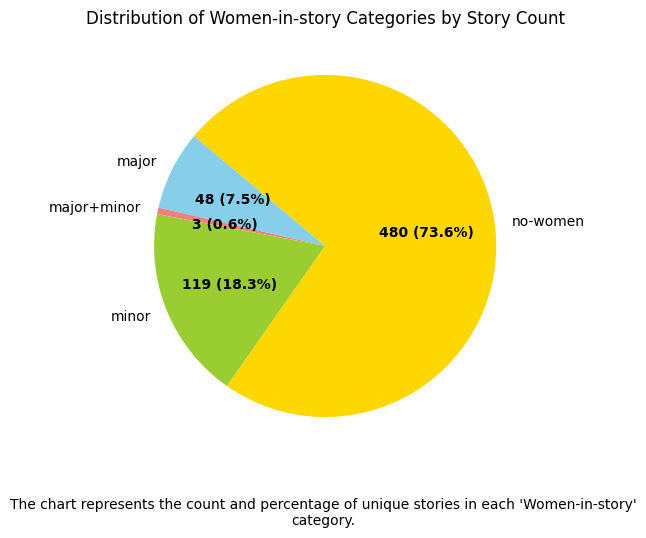

In [63]:

# Group by 'Women-in-story' and count unique stories
story_counts = data.groupby('Women-in-story')['Story'].nunique()

# Calculate total stories
total_stories = story_counts.sum()

# Create a pie chart with count and percentage labels
fig, ax = plt.subplots()

# Plot the pie chart
wedges, texts, autotexts = ax.pie(story_counts, labels=story_counts.index, startangle=140, colors = ['skyblue', 'lightcoral', 'yellowgreen', 'gold']
,
                                  autopct=lambda pct: f'{int(pct*total_stories/100)} ({pct:.1f}%)')

# Customize plot aesthetics
ax.set_title('Distribution of Women-in-story Categories by Story Count')
plt.setp(autotexts, size=10, weight="bold")

# Add explanatory text below the graph
plt.figtext(0.5, -0.1, "The chart represents the count and percentage of unique stories in each 'Women-in-story' category.", wrap=True, horizontalalignment='center', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

In [64]:
# prompt: print the total number of stories, then the total number of stories in the edition "Shivhei-Habesht", then the total number of stories  Shivhei-Habesht stories where Women-in-story="no-women". Bear in mind that stories are differentiated according to their id given in the column Story

# Total number of stories
total_stories = data['Story'].nunique()

# Total number of stories in the edition "Shivhei-Habesht"
shivhei_habesht_stories = data[data['Edition'] == 'Shivhei-Habesht']['Story'].nunique()

# Total number of Shivhei-Habesht stories where Women-in-story="no-women"
shivhei_habesht_no_women_stories = data[(data['Edition'] == 'Shivhei-Habesht') & (data['Women-in-story'] == 'no-women')]['Story'].nunique()

print(f"Total number of stories: {total_stories}")
print(f"Total number of stories in the edition 'Shivhei-Habesht': {shivhei_habesht_stories}")
print(f"Total number of Shivhei-Habesht stories where Women-in-story='no-women': {shivhei_habesht_no_women_stories}")


Total number of stories: 652
Total number of stories in the edition 'Shivhei-Habesht': 216
Total number of Shivhei-Habesht stories where Women-in-story='no-women': 171


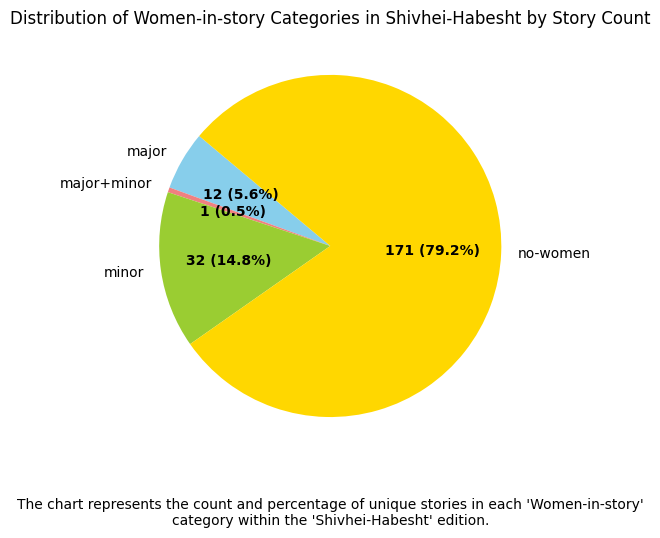

In [65]:
# prompt: now create a pie chart for distribution of Women-in-story in shivhei_habesht_stories

import matplotlib.pyplot as plt
# Group by 'Women-in-story' and count unique stories in Shivhei-Habesht
shivhei_habesht_story_counts = data[data['Edition'] == 'Shivhei-Habesht'].groupby('Women-in-story')['Story'].nunique()

# Create a pie chart with count and percentage labels
fig, ax = plt.subplots()

# Plot the pie chart
wedges, texts, autotexts = ax.pie(shivhei_habesht_story_counts, labels=shivhei_habesht_story_counts.index, startangle=140, colors = ['skyblue', 'lightcoral', 'yellowgreen', 'gold']
,
                                  autopct=lambda pct: f'{int(pct*shivhei_habesht_stories/100)} ({pct:.1f}%)')

# Customize plot aesthetics
ax.set_title('Distribution of Women-in-story Categories in Shivhei-Habesht by Story Count')
plt.setp(autotexts, size=10, weight="bold")

# Add explanatory text below the graph
plt.figtext(0.5, -0.1, "The chart represents the count and percentage of unique stories in each 'Women-in-story' category within the 'Shivhei-Habesht' edition.", wrap=True, horizontalalignment='center', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


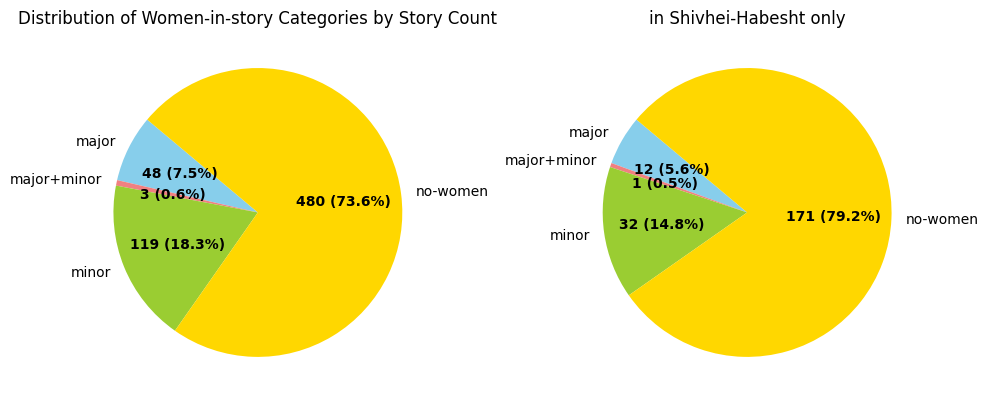

In [68]:
# prompt: combine the code of only  the three last celss to create the two pie charts side-by side and prevent any overlap

import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
from google.colab import files
import seaborn as sns
import numpy as np

# Group by 'Women-in-story' and count unique stories
story_counts = data.groupby('Women-in-story')['Story'].nunique()

# Calculate total stories
total_stories = story_counts.sum()

# Group by 'Women-in-story' and count unique stories in Shivhei-Habesht
shivhei_habesht_story_counts = data[data['Edition'] == 'Shivhei-Habesht'].groupby('Women-in-story')['Story'].nunique()

# Create the figure and two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first pie chart
wedges, texts, autotexts = ax1.pie(story_counts, labels=story_counts.index, startangle=140, colors = ['skyblue', 'lightcoral', 'yellowgreen', 'gold']
,
                                  autopct=lambda pct: f'{int(pct*total_stories/100)} ({pct:.1f}%)')

# Customize the first plot
ax1.set_title('Distribution of Women-in-story Categories by Story Count')
plt.setp(autotexts, size=10, weight="bold")

# Plot the second pie chart
wedges, texts, autotexts = ax2.pie(shivhei_habesht_story_counts, labels=shivhei_habesht_story_counts.index, startangle=140, colors = ['skyblue', 'lightcoral', 'yellowgreen', 'gold']
,
                                  autopct=lambda pct: f'{int(pct*shivhei_habesht_stories/100)} ({pct:.1f}%)')

# Customize the second plot
ax2.set_title('in Shivhei-Habesht only')
plt.setp(autotexts, size=10, weight="bold")

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


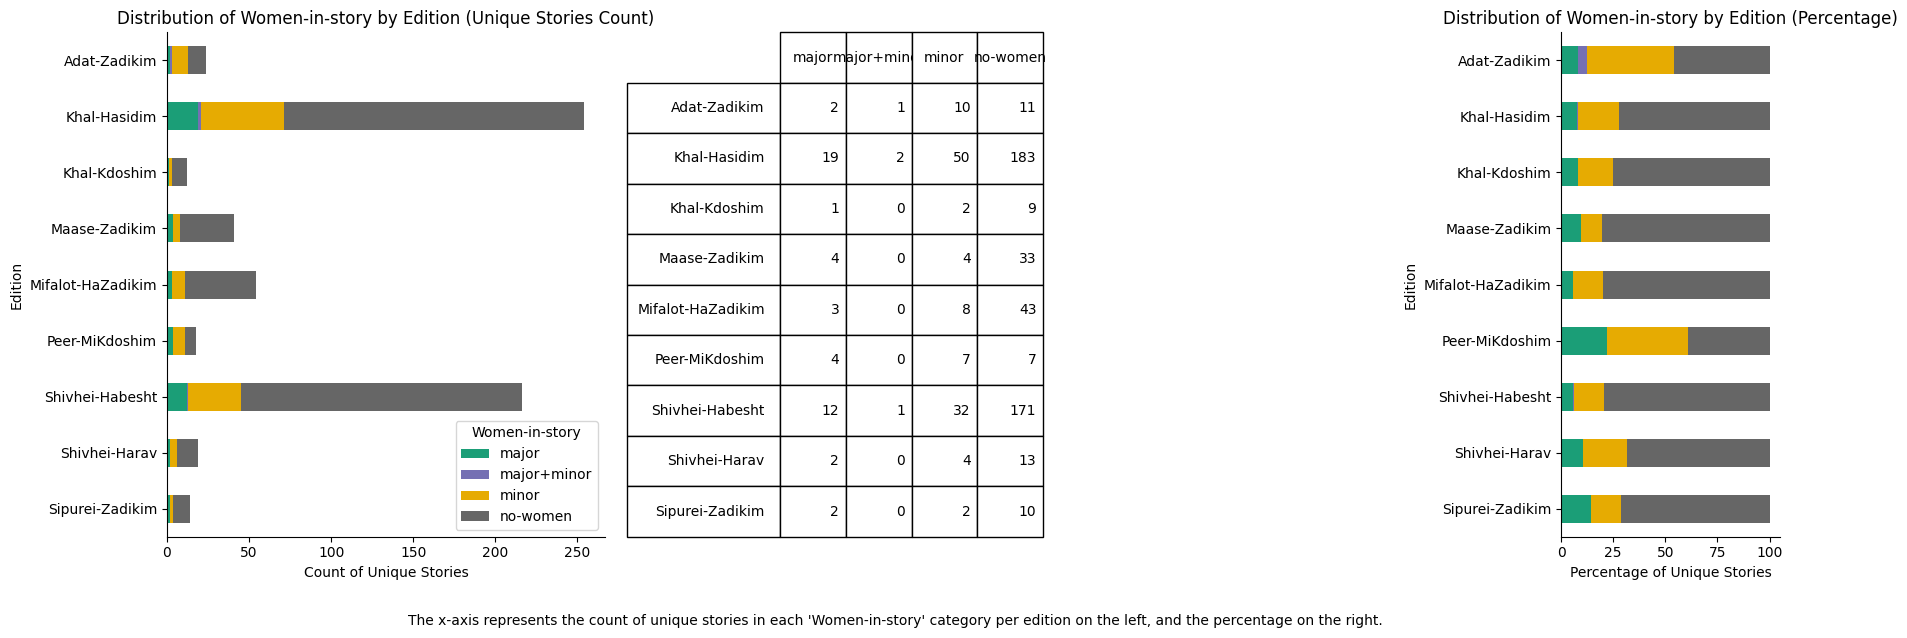

In [129]:
# Import necessary libraries
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'data' is your DataFrame containing the TSV data
# Group by 'Edition' and 'Women-in-story', then count unique stories
grouped_data = data.groupby(['Edition', 'Women-in-story'])['Story'].nunique().unstack().fillna(0).astype(int)

# Order editions for consistent display

ordered_data = grouped_data.sort_index(ascending=False)

# Calculate percentages
percent_data = (ordered_data.div(ordered_data.sum(axis=1), axis=0) * 100).astype(float)

# Plotting the grouped data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6), gridspec_kw={'width_ratios': [2, 1]})

# Bar chart with counts
ordered_data.plot(kind='barh', stacked=True, colormap='Dark2', ax=ax1)
ax1.spines[['top', 'right']].set_visible(False)
ax1.set_xlabel('Count of Unique Stories')
ax1.set_ylabel('Edition')
ax1.set_title('Distribution of Women-in-story by Edition (Unique Stories Count)')
#ax1.legend(title='Women-in-story', bbox_to_anchor=(1.05, 1), loc='upper left')

# Sort the DataFrame by index in descending order (Z-A)
ordered_data_desc = ordered_data.sort_index(ascending=True)

# Adding a table on the right side of the first plot (using the descending sorted DataFrame)
table_data = ordered_data_desc
table = ax1.table(cellText=table_data.values, rowLabels=table_data.index, colLabels=table_data.columns,
                  cellLoc='right', rowLoc='right', colLoc='center', bbox=[1.4, 0, 0.6, 1])
table.auto_set_font_size(False)
table.set_fontsize(10)

# Format table data to remove .0
for key, cell in table.get_celld().items():
    if key[0] > 0 and key[1] > -1:
        cell.get_text().set_text(int(float(cell.get_text().get_text())))

# Sort the DataFrame by 'Edition' column in ascending order (A-Z)
percent_data_sorted = percent_data.sort_values('Edition', ascending=False)

# Bar chart with percentages (using the sorted DataFrame)
percent_data_sorted.plot(kind='barh', stacked=True, colormap='Dark2', ax=ax2)
ax2.spines[['top', 'right']].set_visible(False)
ax2.set_xlabel('Percentage of Unique Stories')
ax2.set_ylabel('Edition')
ax2.set_title('Distribution of Women-in-story by Edition (Percentage)')
ax2.legend_.remove()

# Adjust layout to make space for the table and second plot
plt.tight_layout()
plt.figtext(0.5, -0.05, "The x-axis represents the count of unique stories in each 'Women-in-story' category per edition on the left, and the percentage on the right.", wrap=True, horizontalalignment='center', fontsize=10)

plt.show()


In [ ]:
# prompt: output as vector graph

from matplotlib.backends.backend_svg import FigureCanvasSVG
import matplotlib.pyplot as plt

# Create the figure and axes
fig, ax = plt.subplots()

# Plot the data
# ... (your plotting code here)

# Create the SVG backend
canvas = FigureCanvasSVG(fig)

# Save the figure as an SVG file
canvas.print_svg('figure.svg')


##Topic exploration
In this section we first explore the relative distribution of stories according to the status of women in them across the different topics, and then use statistics to measure the significant differences in frequency of topics between the women related categories.

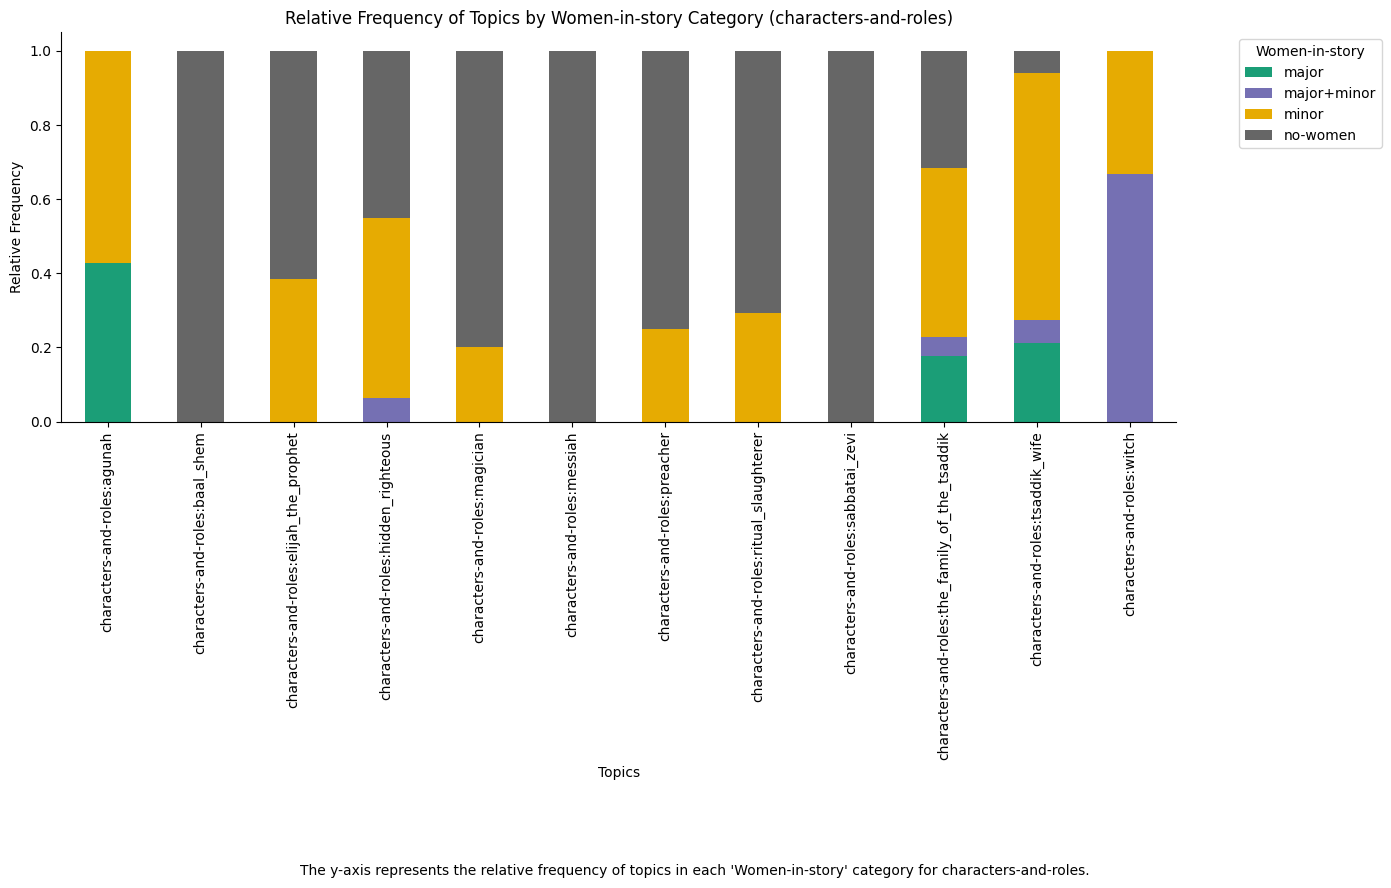

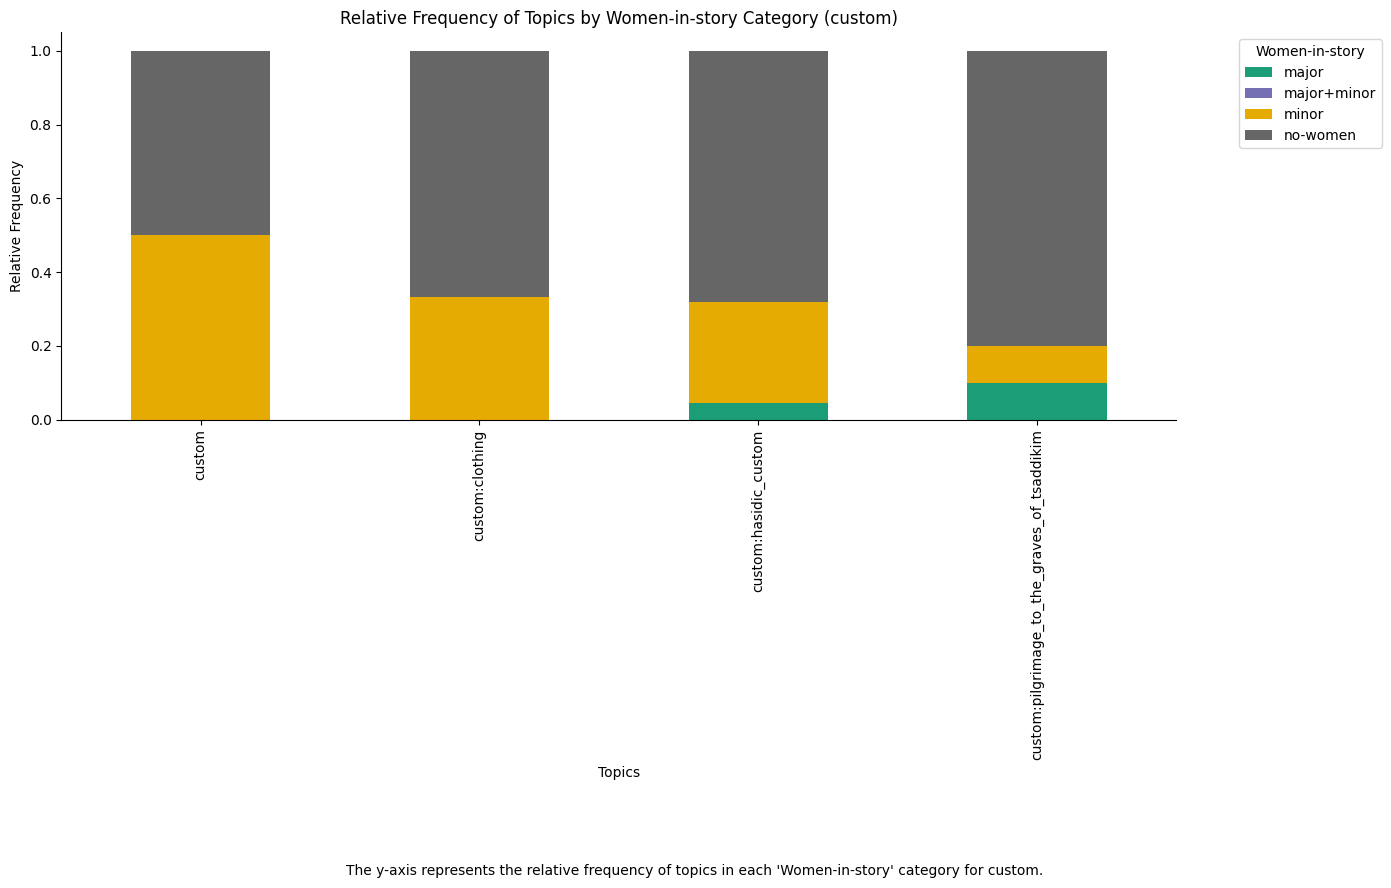

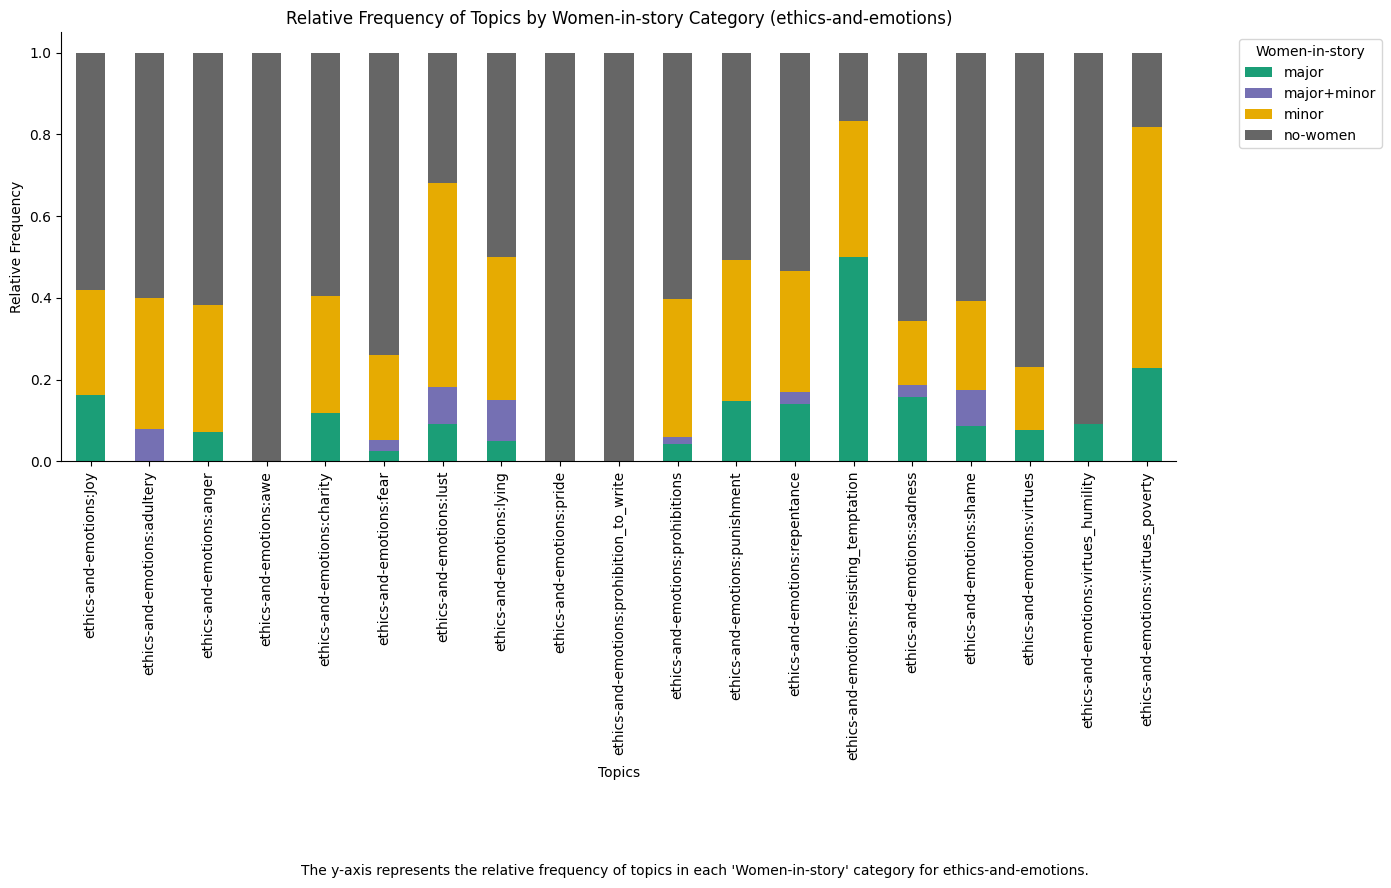

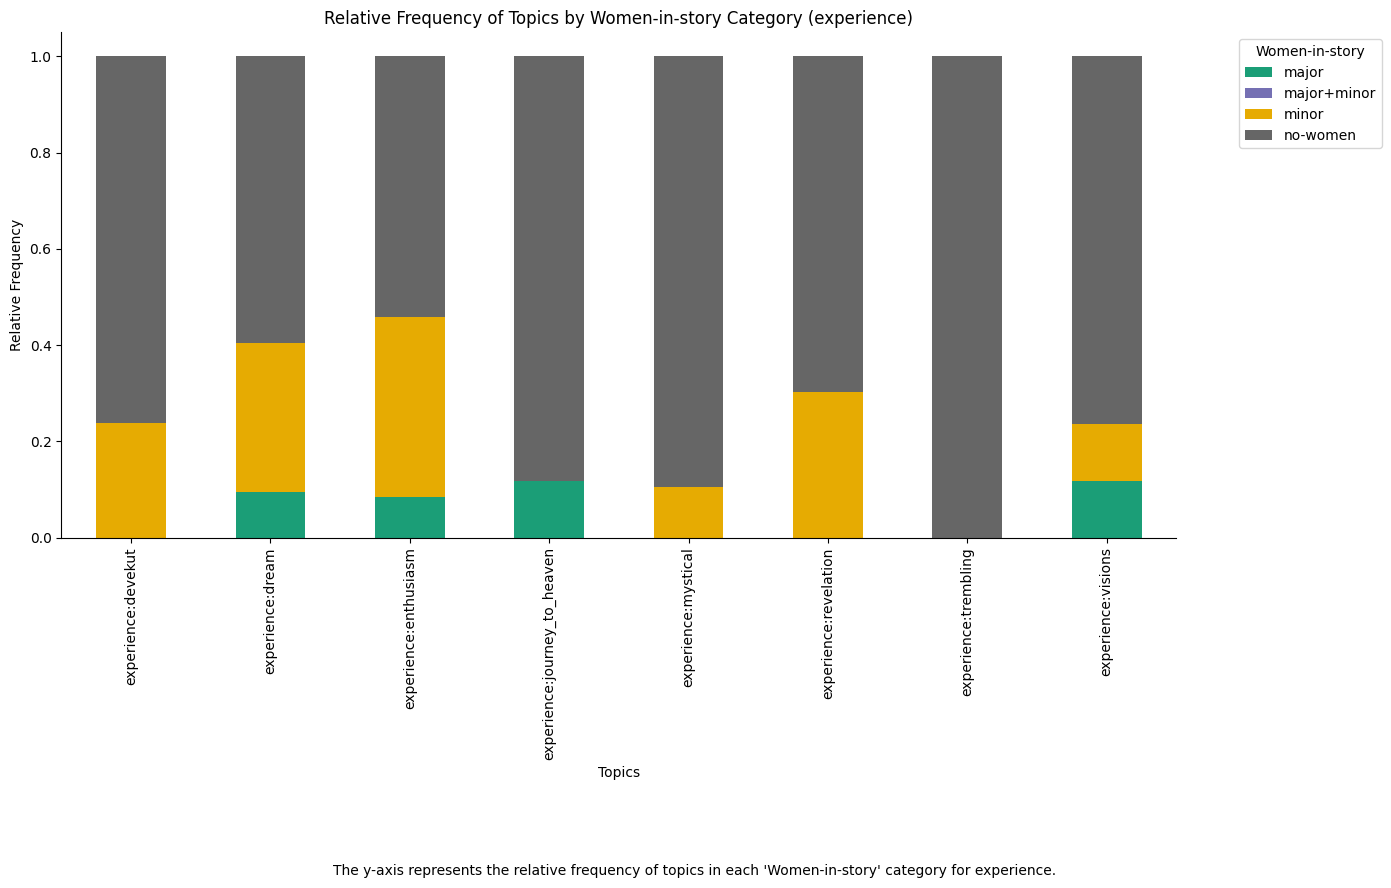

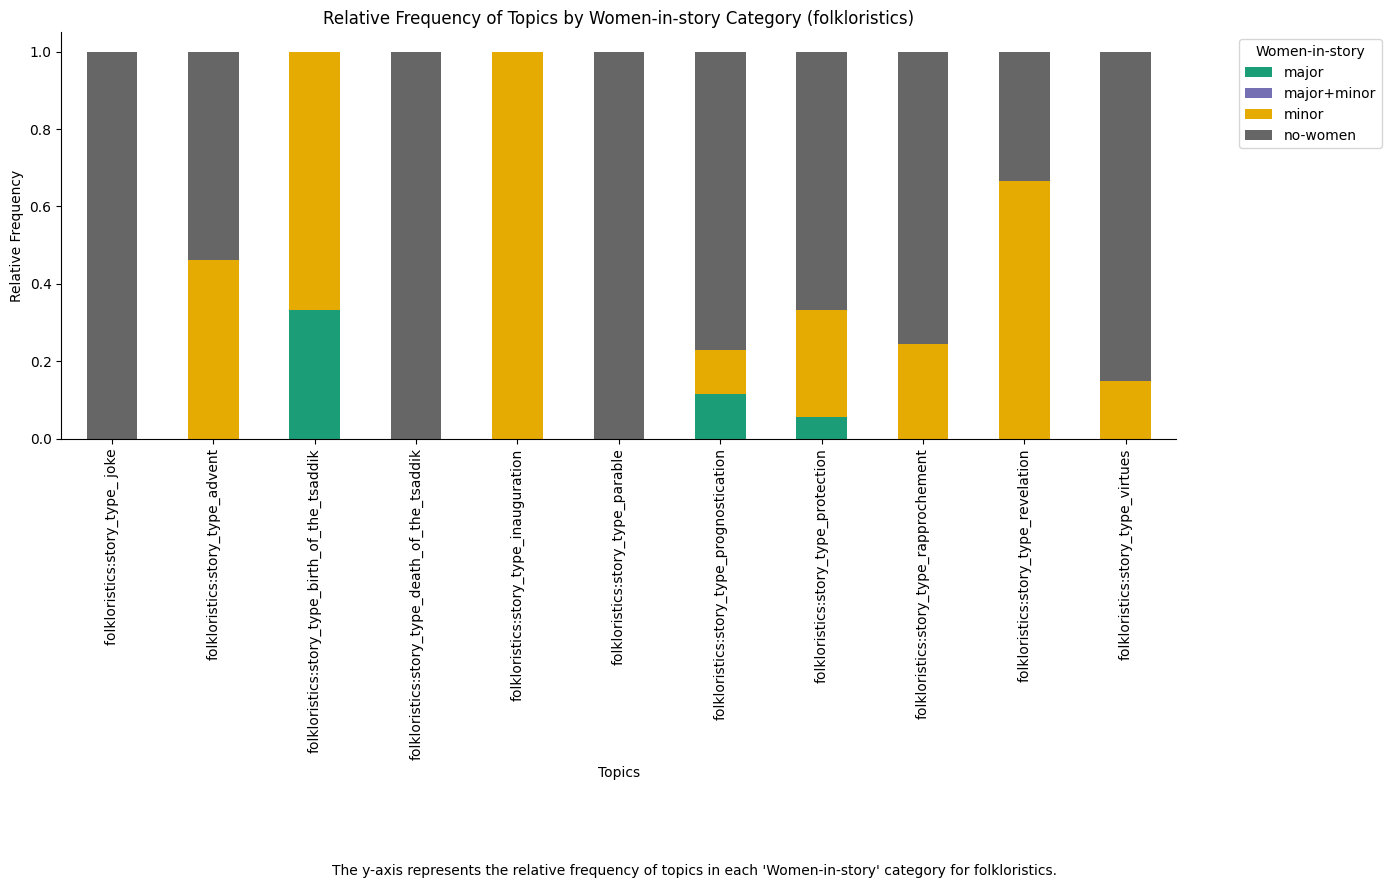

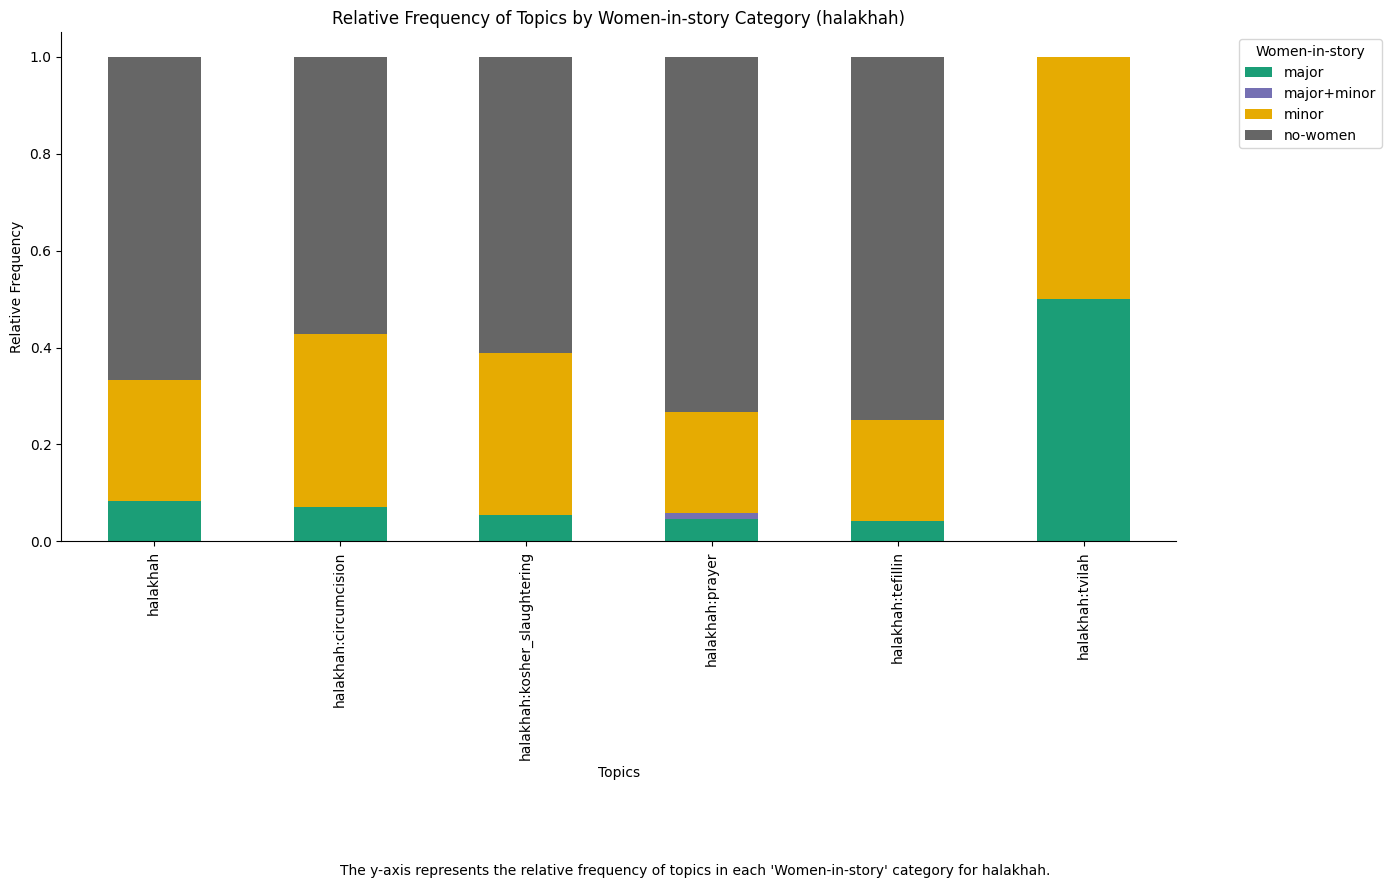

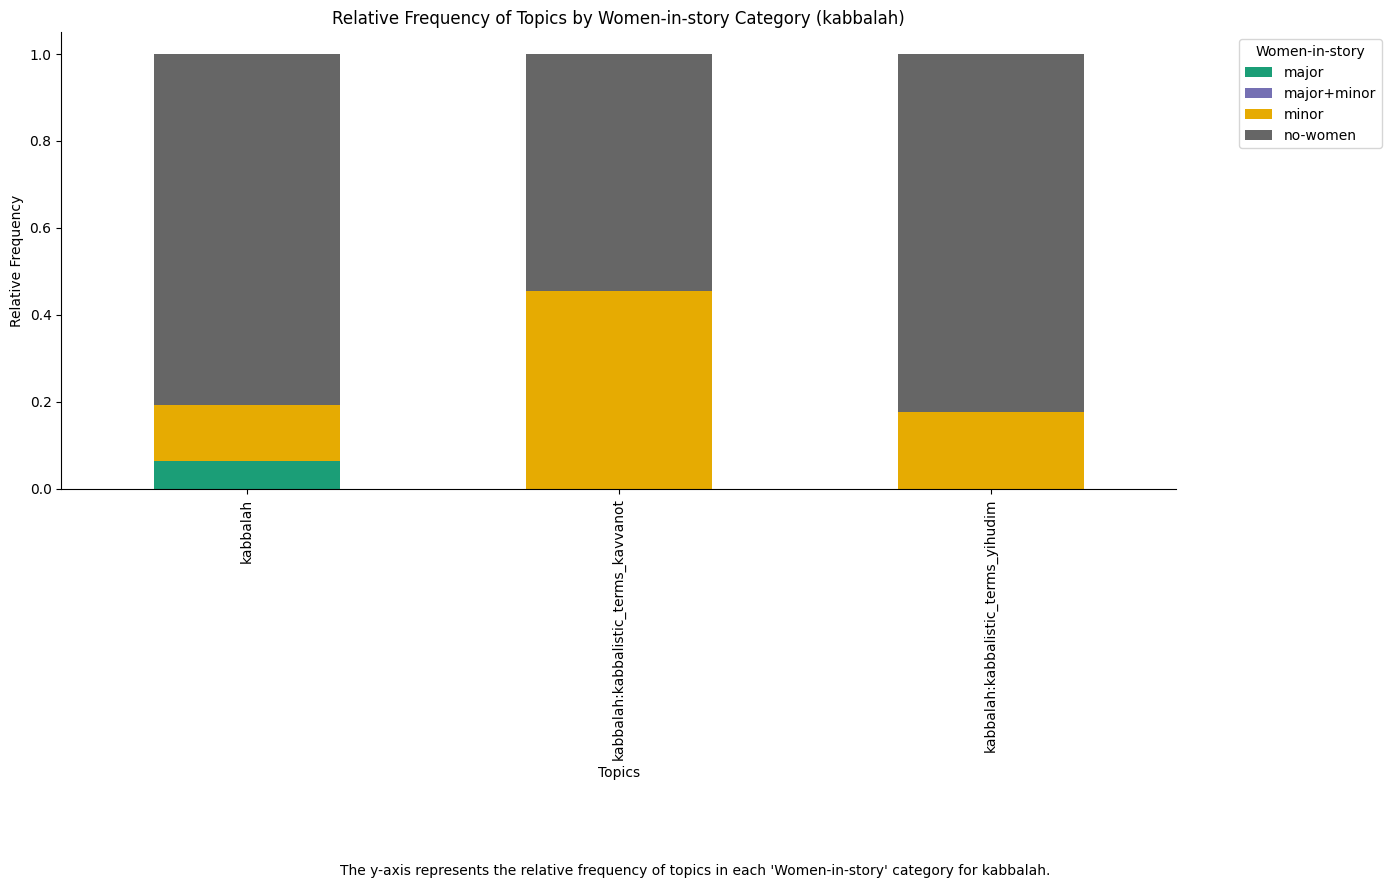

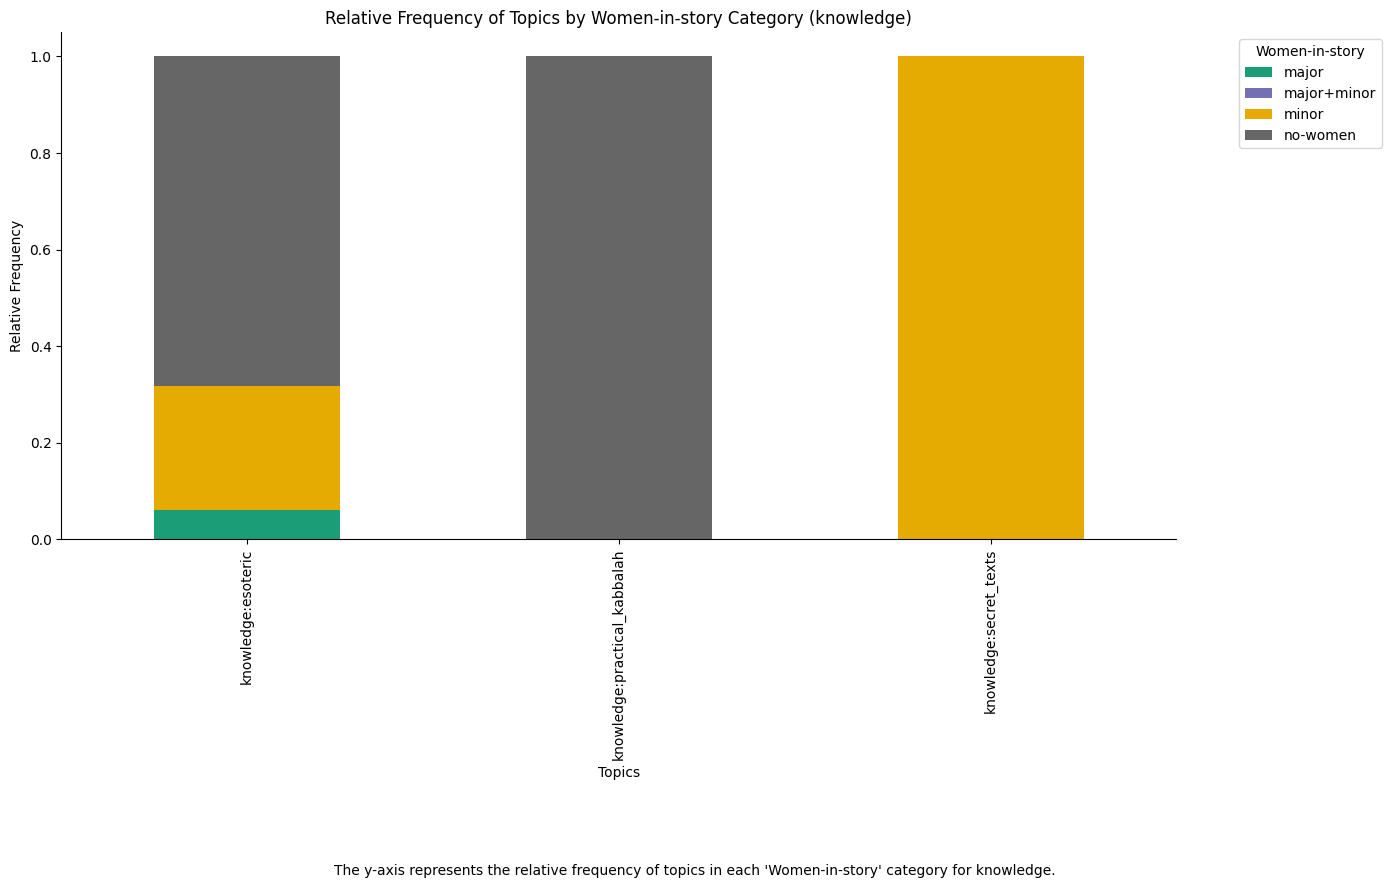

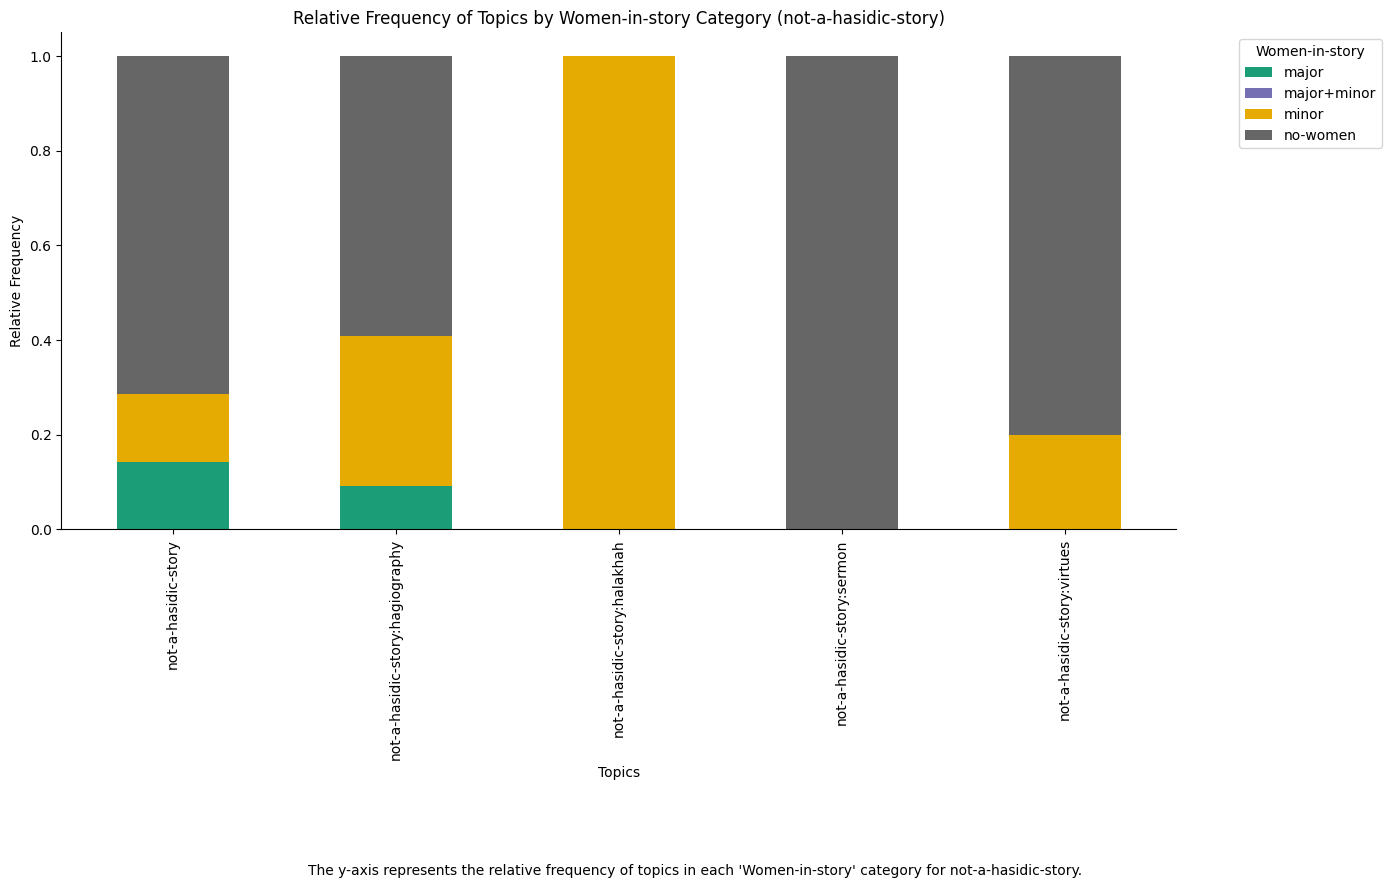

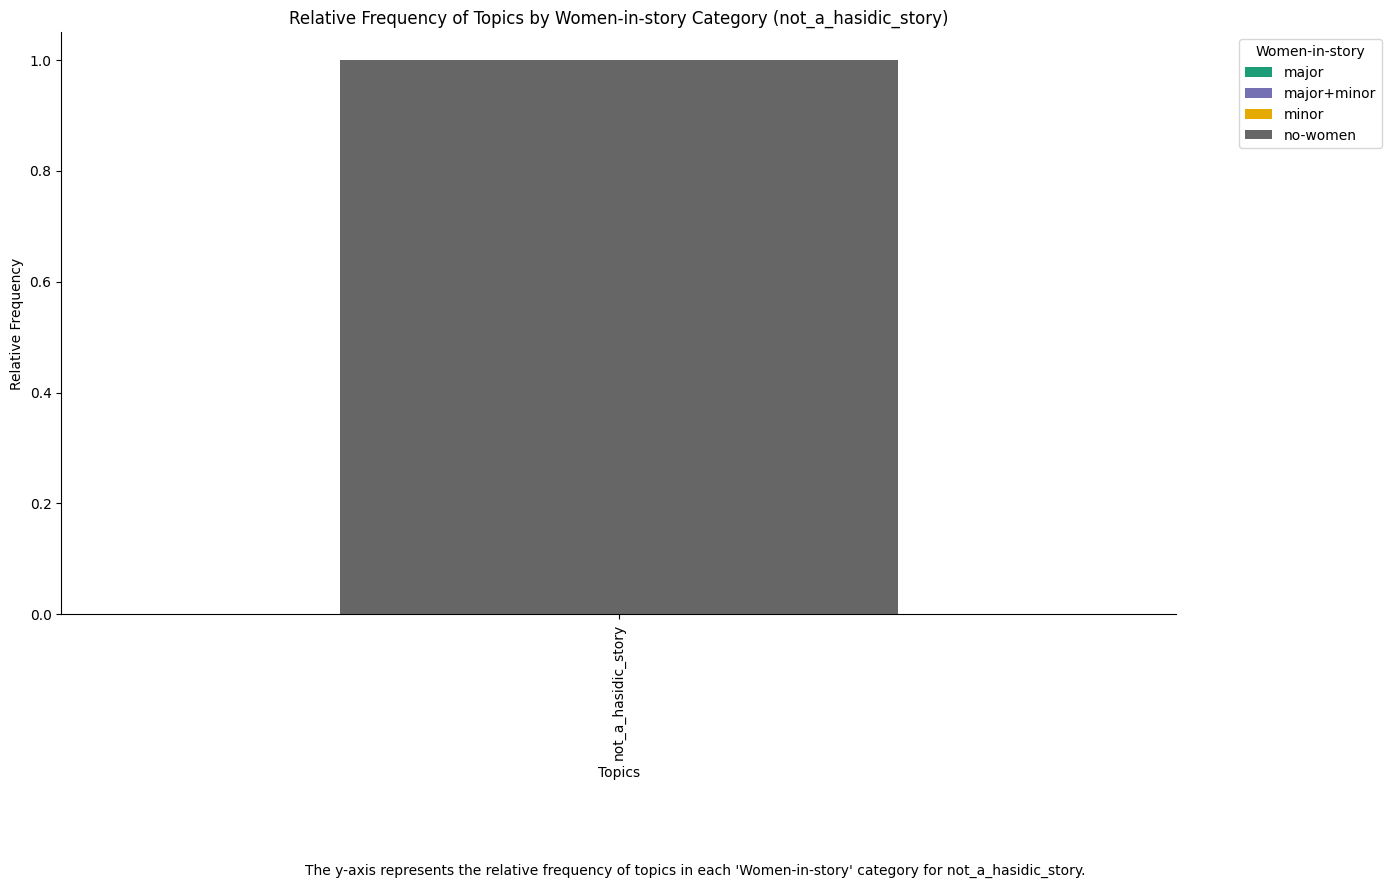

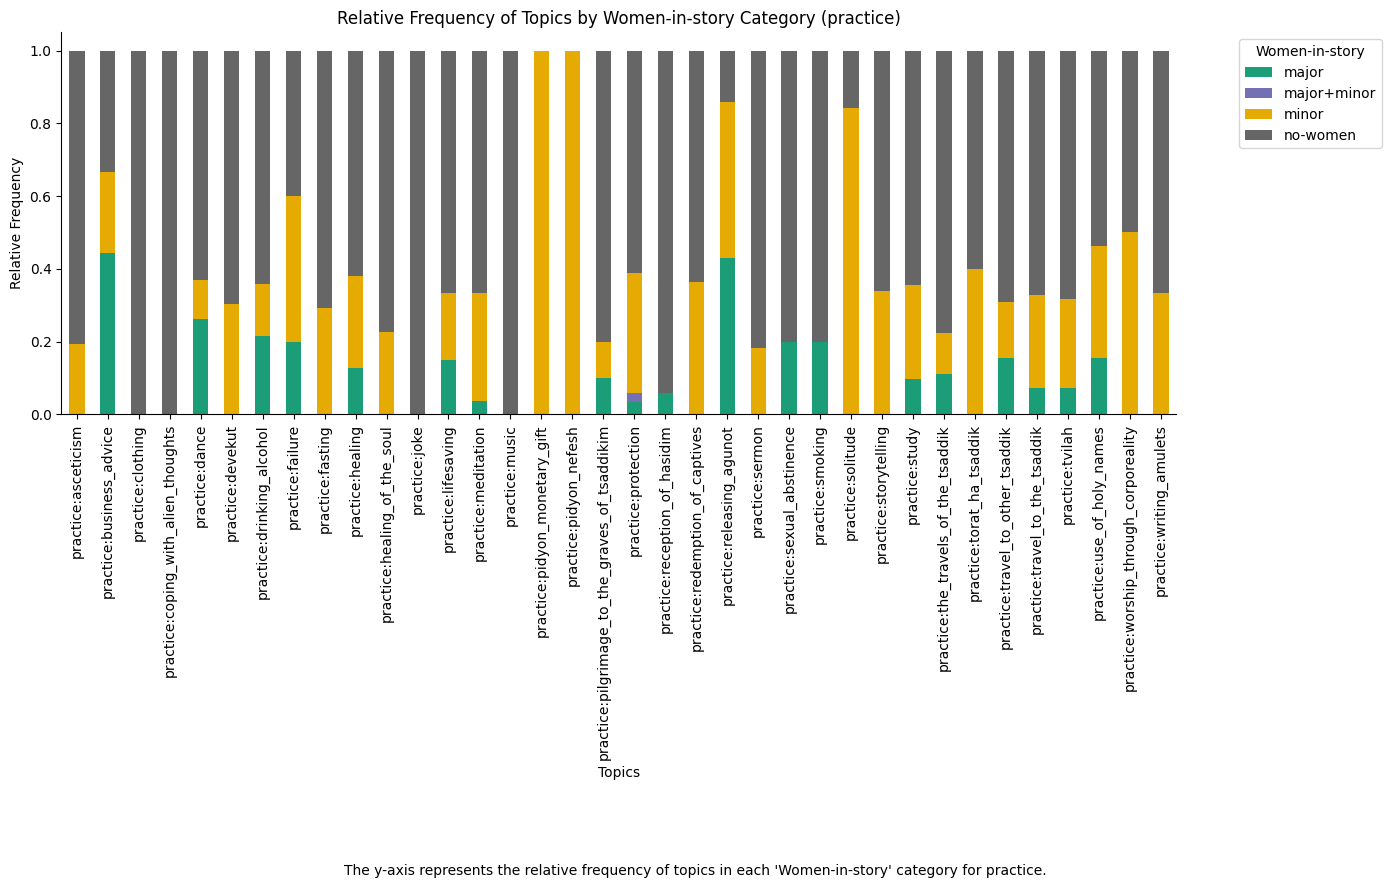

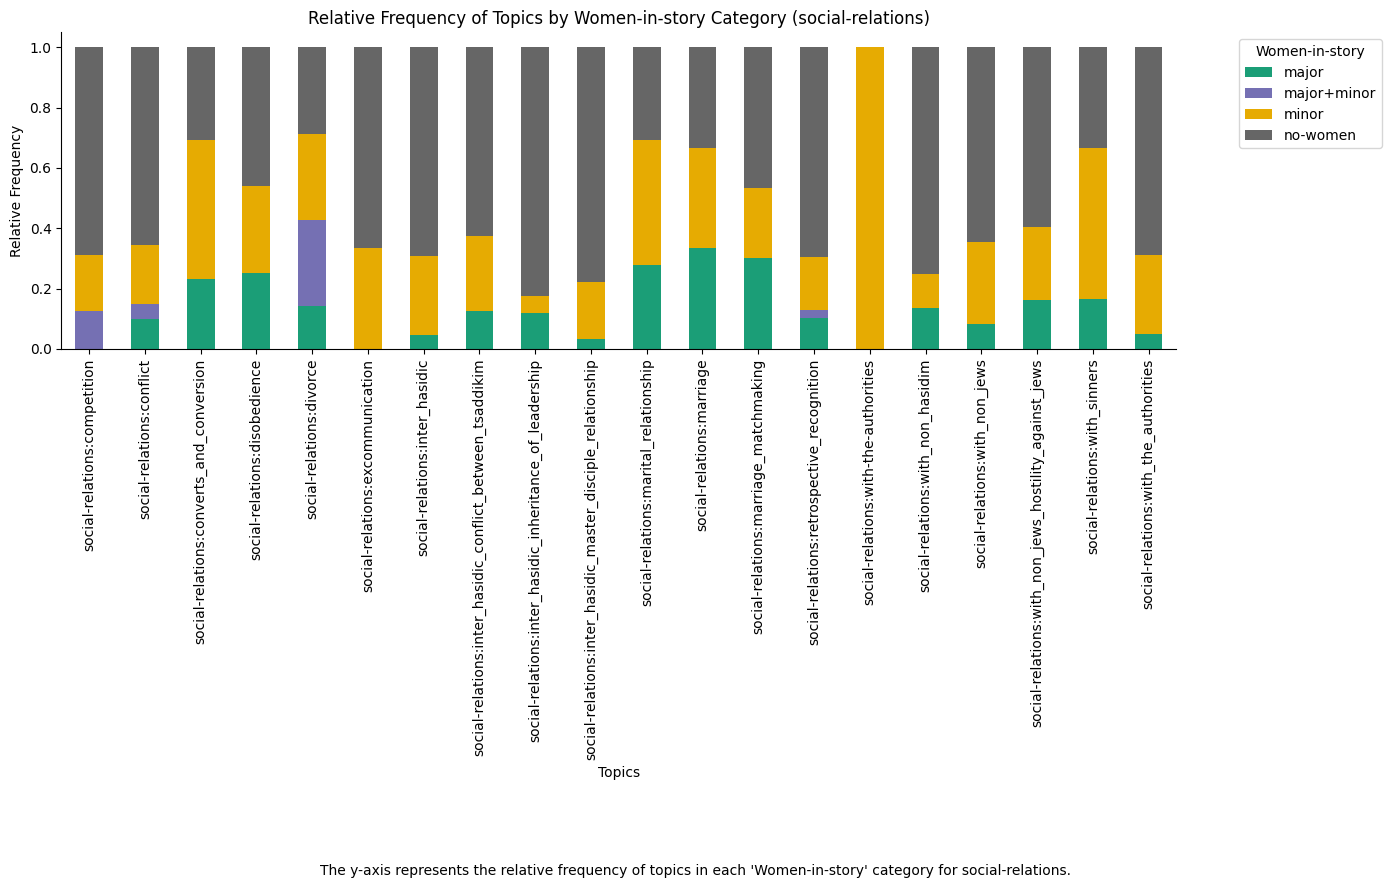

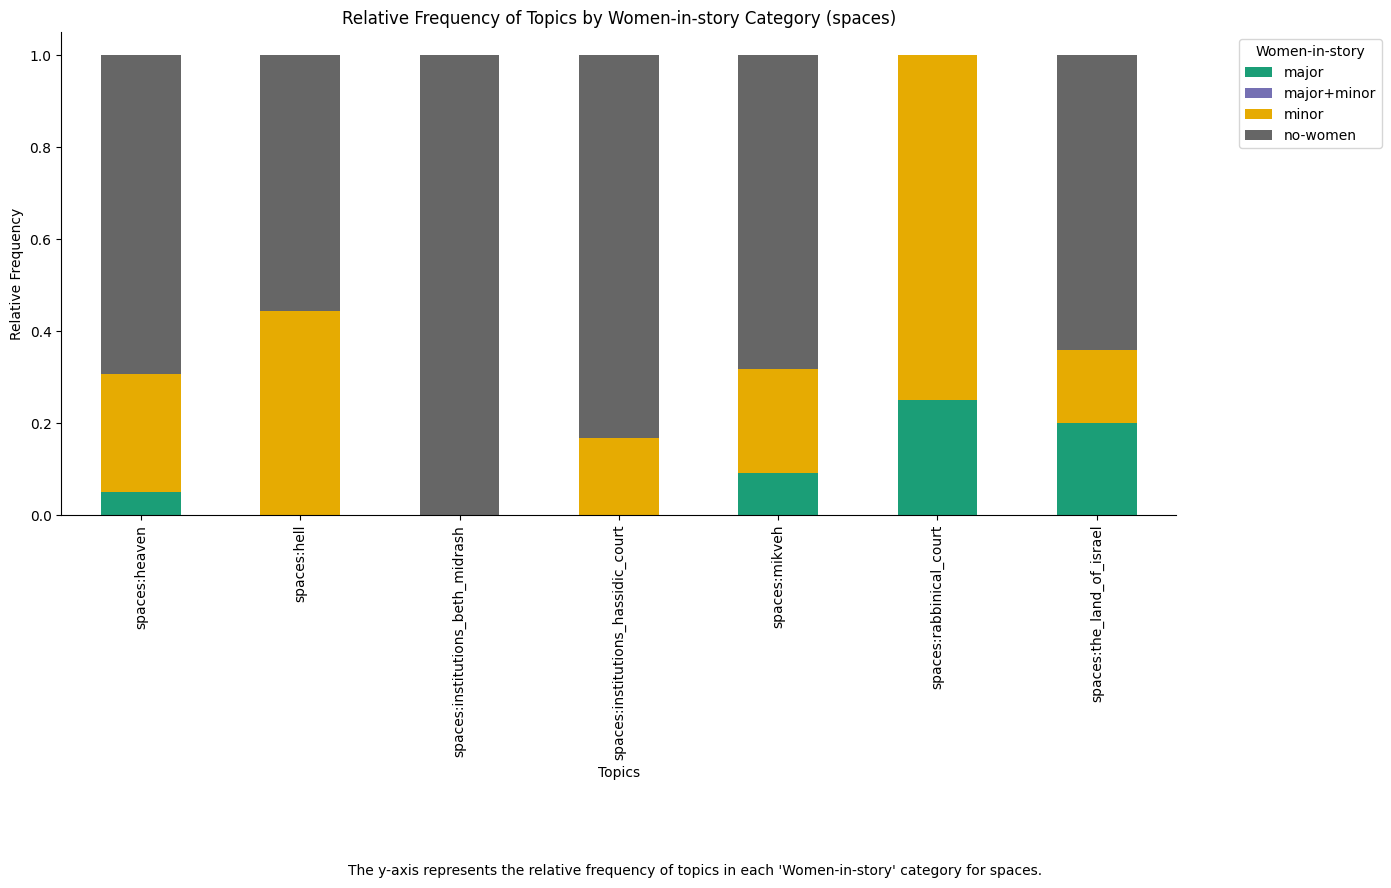

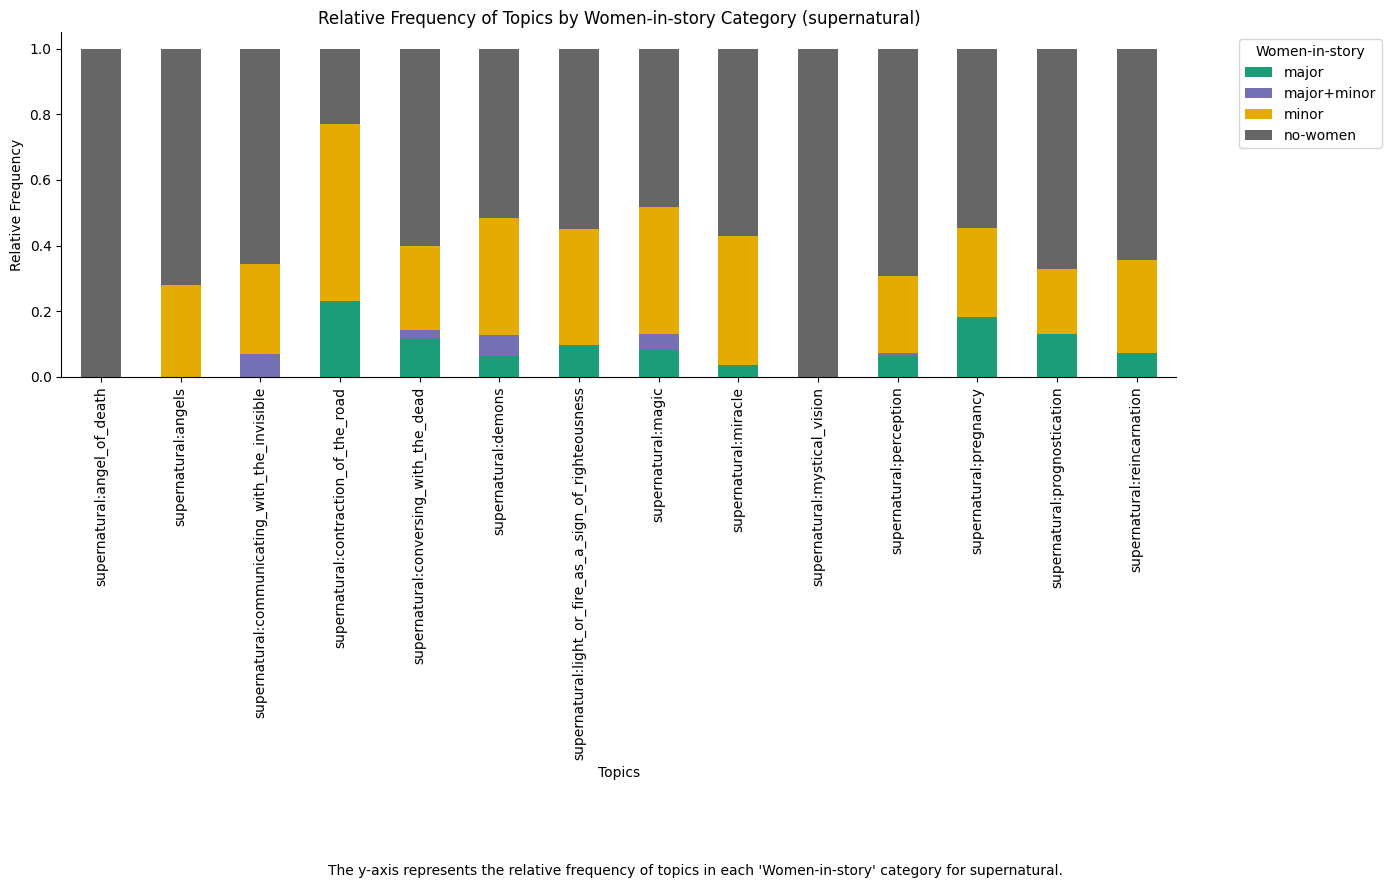

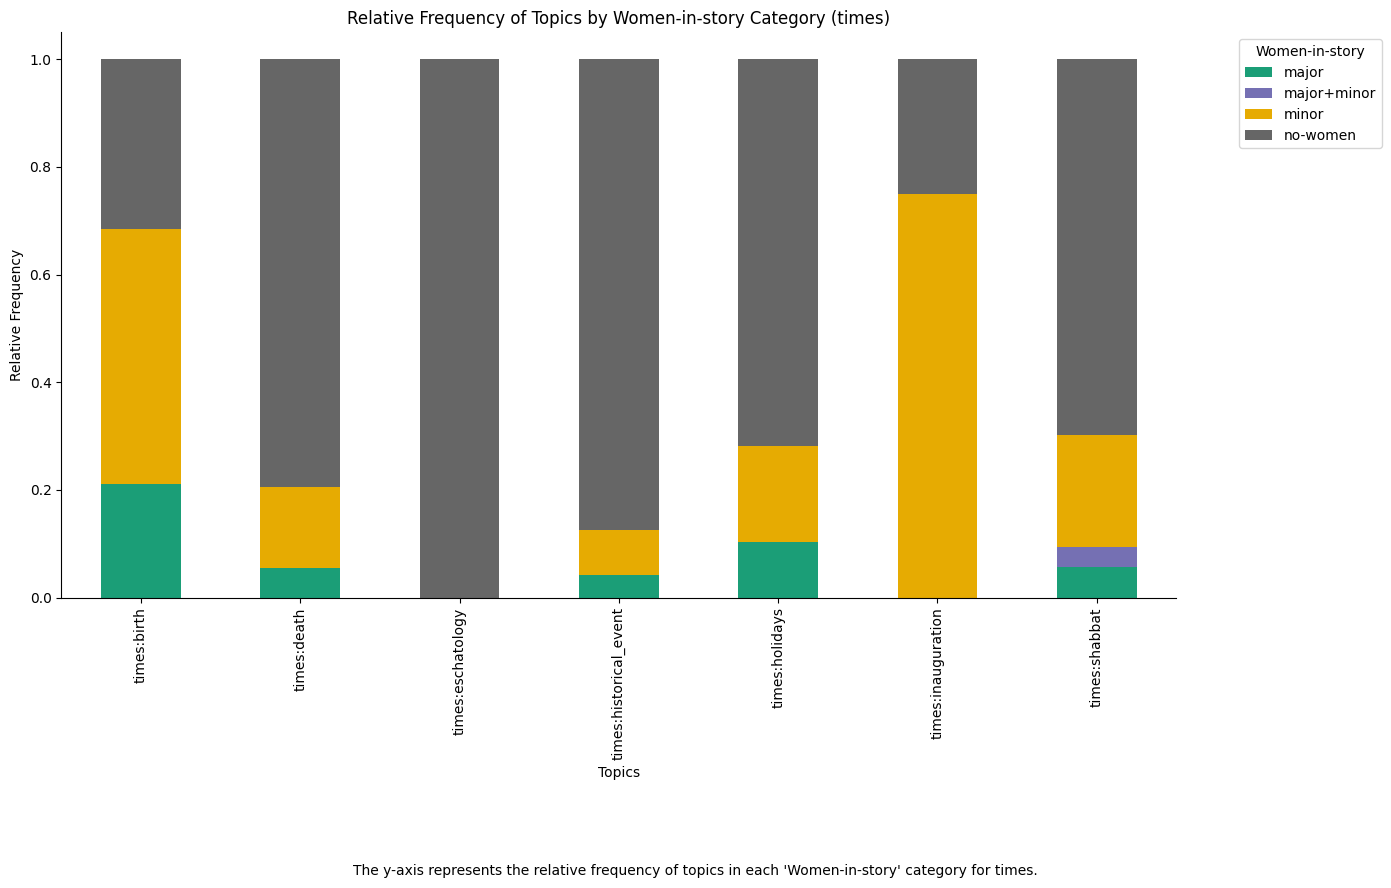

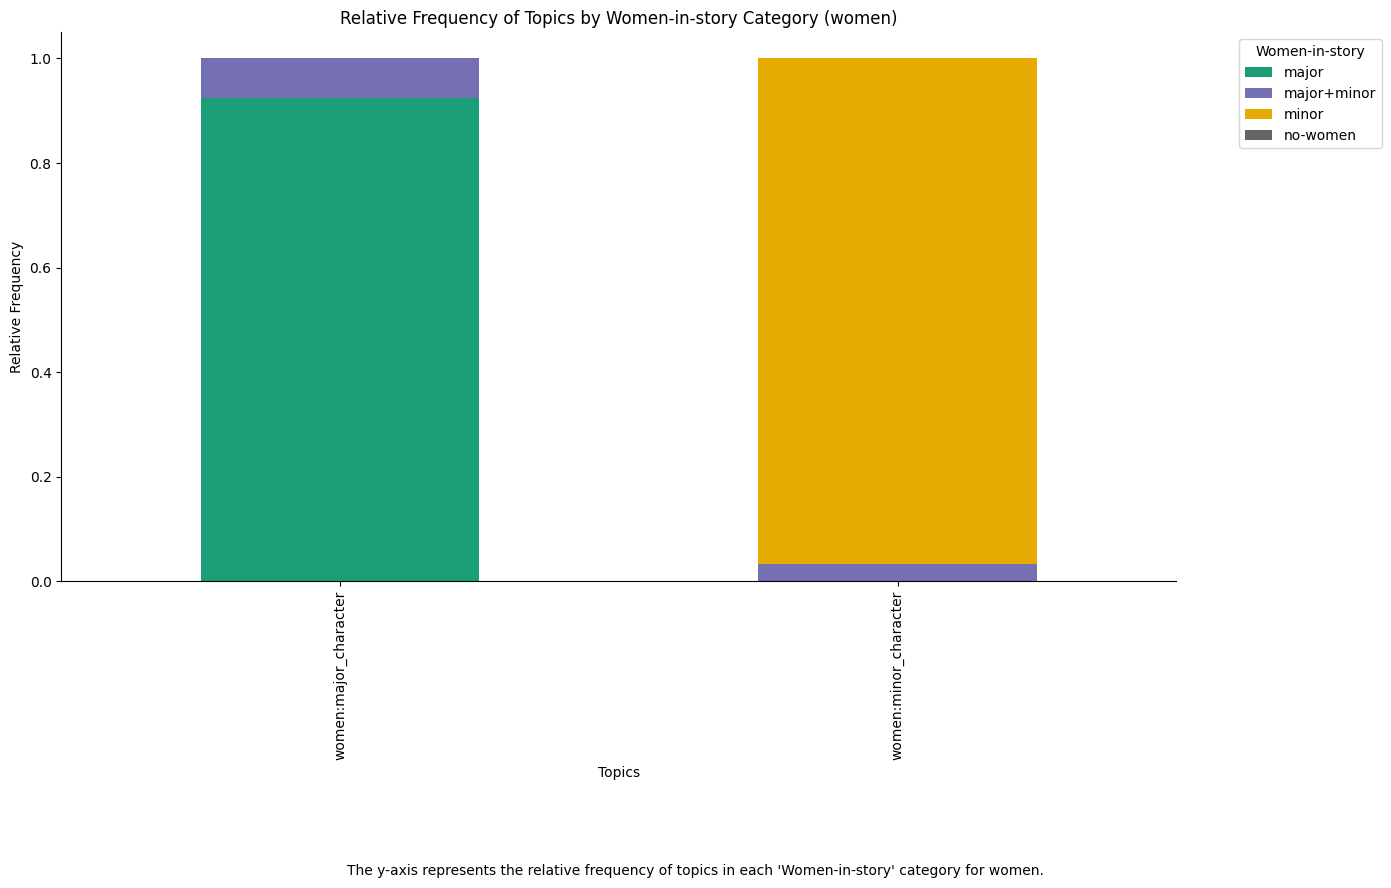

In [ ]:

# Extract the base topic (word before the underscore) for grouping
data['base_topic'] = data['full tag'].apply(lambda x: x.split(':')[0])

# Group by 'base_topic' and 'full tag', then count unique stories
topic_counts = data.groupby(['base_topic', 'full tag', 'Women-in-story'])['Story'].nunique().unstack().fillna(0)

# Calculate the relative frequency of topics within each 'full tag'
relative_frequencies = topic_counts.div(topic_counts.sum(axis=1), axis=0)

# Get the unique base topics
base_topics = relative_frequencies.index.get_level_values(0).unique()

# Plotting each base topic separately
for base_topic in base_topics:
    fig, ax = plt.subplots(figsize=(14, 8))

    # Filter data for the current base topic
    current_data = relative_frequencies.loc[base_topic]

    # Plot the relative frequencies as a stacked bar chart
    current_data.plot(kind='bar', stacked=True, colormap='Dark2', ax=ax)

    # Customize plot aesthetics
    ax.spines[['top', 'right']].set_visible(False)
    ax.set_xlabel('Topics')
    ax.set_ylabel('Relative Frequency')
    ax.set_title(f'Relative Frequency of Topics by Women-in-story Category ({base_topic})')
    ax.legend(title='Women-in-story', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Add explanatory text below the graph
    plt.figtext(0.5, -0.1, f"The y-axis represents the relative frequency of topics in each 'Women-in-story' category for {base_topic}.", wrap=True, horizontalalignment='center', fontsize=10)

    plt.tight_layout()
    plt.show()


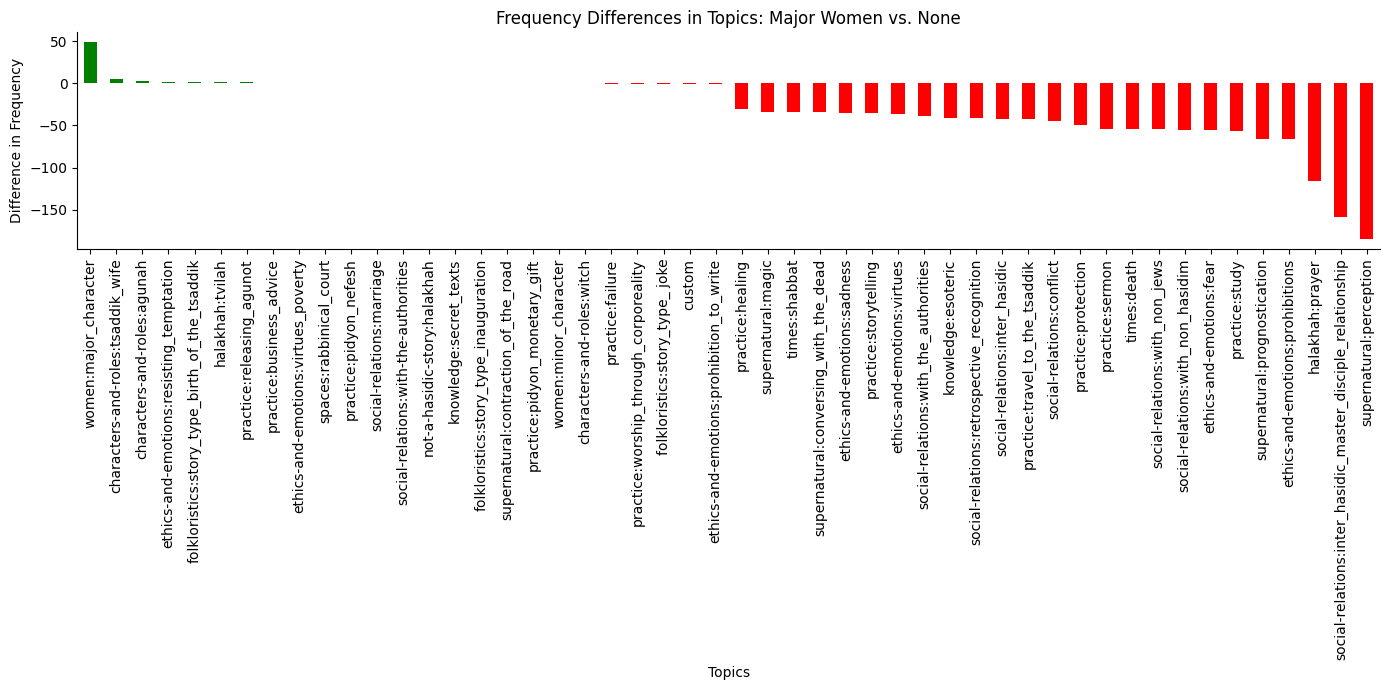

In [15]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame containing the TSV data
# Group by 'Women-in-story' and 'full tag', then count unique stories
topic_counts = data.groupby(['Women-in-story', 'full tag'])['Story'].nunique().unstack().fillna(0)

# Calculate the frequency differences
major_vs_none = topic_counts.loc['major'] - topic_counts.loc['no-women']

# Sort the differences from positive large to negative small
major_vs_none = major_vs_none.sort_values(ascending=False)

# Remove 50 bars from the middle, keeping the most significant differences on both sides
num_bars_to_remove = 50
keep_indices = list(range(num_bars_to_remove // 2)) + list(range(-num_bars_to_remove // 2, 0))
major_vs_none_trimmed = major_vs_none.iloc[keep_indices]

# Plot the data
fig, ax = plt.subplots(figsize=(14, 7))

# Plot for Major vs None
major_vs_none_trimmed.plot(kind='bar', ax=ax, color=['green' if x > 0 else 'red' for x in major_vs_none_trimmed])
ax.set_title("Frequency Differences in Topics: Major Women vs. None")
ax.set_ylabel('Difference in Frequency')
ax.set_xlabel('Topics')
ax.tick_params(axis='x', rotation=90)

# Customize plot aesthetics
plt.gca().spines[['top', 'right']].set_visible(False)

plt.tight_layout()
plt.show()


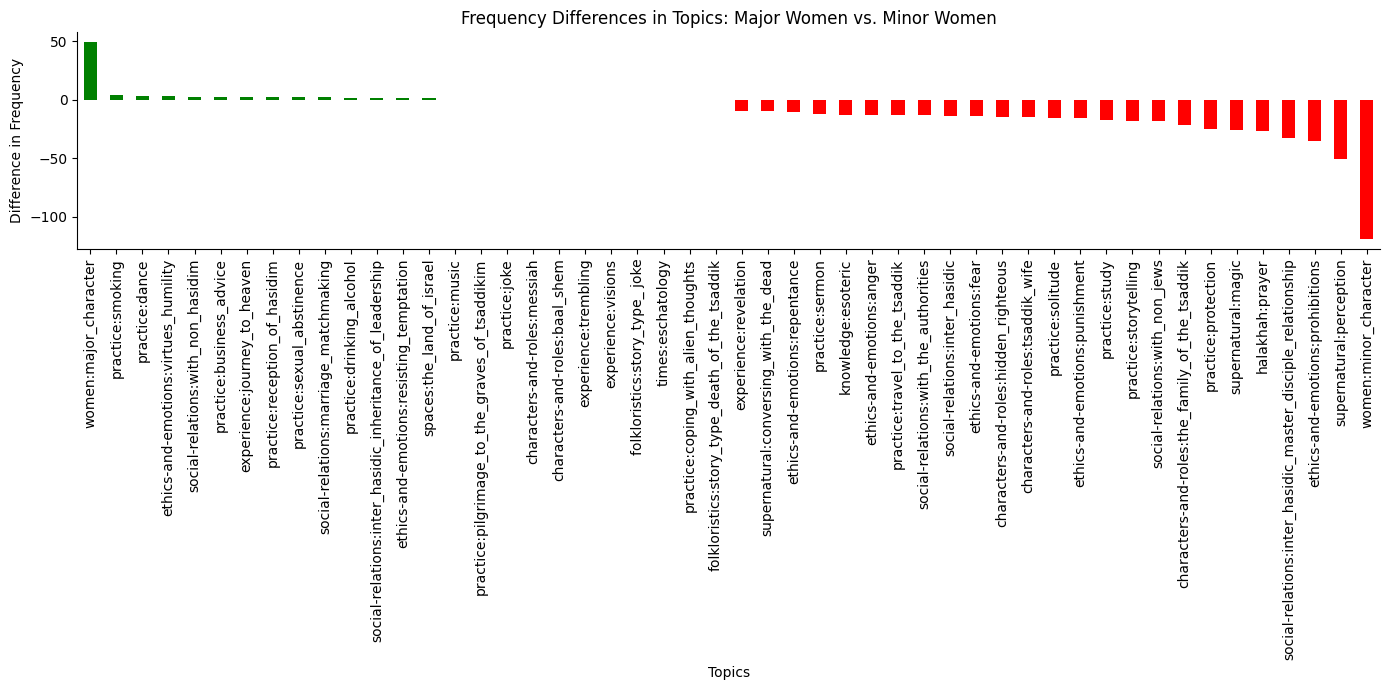

In [ ]:

# Assuming 'data' is your DataFrame containing the TSV data
# Group by 'Women-in-story' and 'full tag', then count unique stories
topic_counts = data.groupby(['Women-in-story', 'full tag'])['Story'].nunique().unstack().fillna(0)

# Calculate the frequency differences
major_vs_minor = topic_counts.loc['major'] - topic_counts.loc['minor']

# Sort the differences from positive large to negative small
major_vs_minor = major_vs_minor.sort_values(ascending=False)

# Remove 50 bars from the middle, keeping the most significant differences on both sides
num_bars_to_remove = 50
keep_indices = list(range(num_bars_to_remove // 2)) + list(range(-num_bars_to_remove // 2, 0))
major_vs_minor_trimmed = major_vs_minor.iloc[keep_indices]

# Plot the data
fig, ax = plt.subplots(figsize=(14, 7))

# Plot for Major vs Minor
major_vs_minor_trimmed.plot(kind='bar', ax=ax, color=['green' if x > 0 else 'red' for x in major_vs_minor_trimmed])
ax.set_title("Frequency Differences in Topics: Major Women vs. Minor Women")
ax.set_ylabel('Difference in Frequency')
ax.set_xlabel('Topics')
ax.tick_params(axis='x', rotation=90)

# Customize plot aesthetics
plt.gca().spines[['top', 'right']].set_visible(False)

plt.tight_layout()
plt.show()

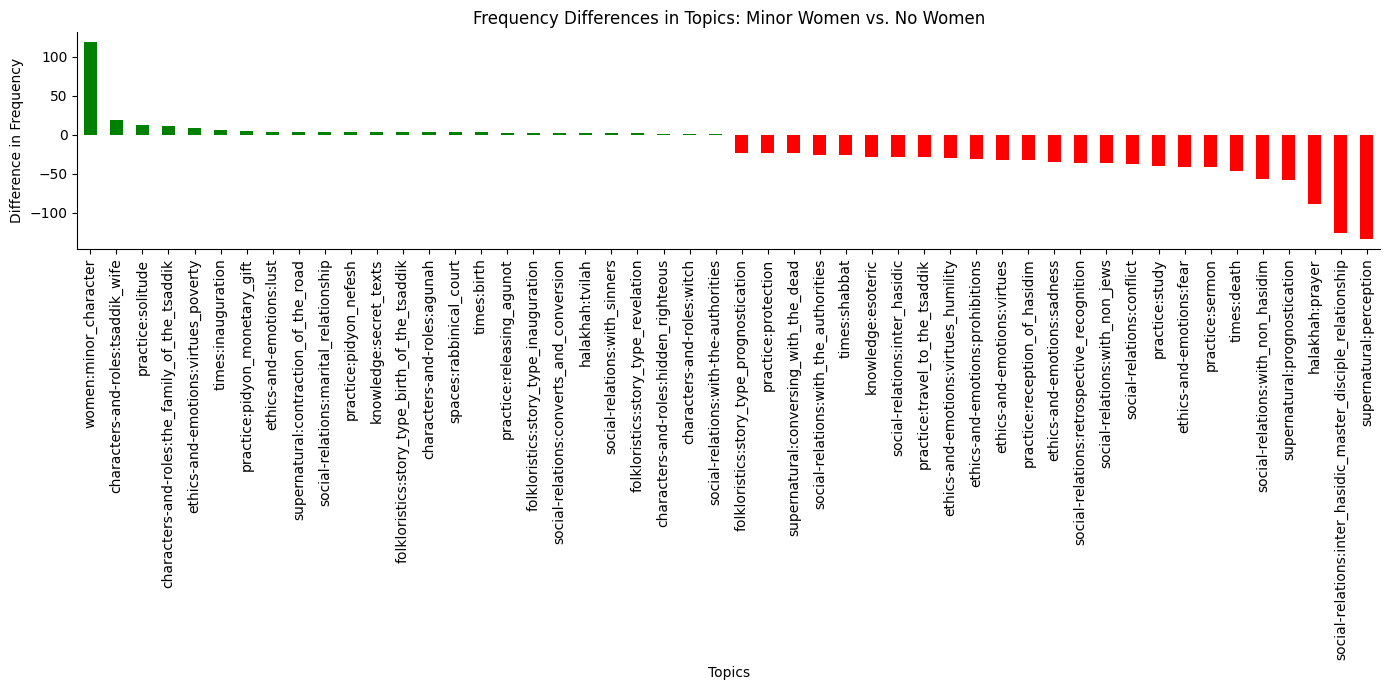

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame containing the TSV data
# Group by 'Women-in-story' and 'full tag', then count unique stories
topic_counts = data.groupby(['Women-in-story', 'full tag'])['Story'].nunique().unstack().fillna(0)

# Calculate the frequency differences
minor_vs_none = topic_counts.loc['minor'] - topic_counts.loc['no-women']

# Sort the differences from positive large to negative small
minor_vs_none = minor_vs_none.sort_values(ascending=False)

# Remove 50 bars from the middle, keeping the most significant differences on both sides
num_bars_to_remove = 50
keep_indices = list(range(num_bars_to_remove // 2)) + list(range(-num_bars_to_remove // 2, 0))
minor_vs_none_trimmed = minor_vs_none.iloc[keep_indices]

# Plot the data
fig, ax = plt.subplots(figsize=(14, 7))

# Plot for Minor vs None
minor_vs_none_trimmed.plot(kind='bar', ax=ax, color=['green' if x > 0 else 'red' for x in minor_vs_none_trimmed])
ax.set_title("Frequency Differences in Topics: Minor Women vs. No Women")
ax.set_ylabel('Difference in Frequency')
ax.set_xlabel('Topics')
ax.tick_params(axis='x', rotation=90)

# Customize plot aesthetics
plt.gca().spines[['top', 'right']].set_visible(False)

plt.tight_layout()
plt.show()



Results for the topic 'characters-and-roles:tsaddik_wife':
                        Observed Counts  Expected Counts  Total Stories
Women-in-story-grouped                                                 
no-women                            3.0         21.29448            480
with-women                         31.0         12.70552            172


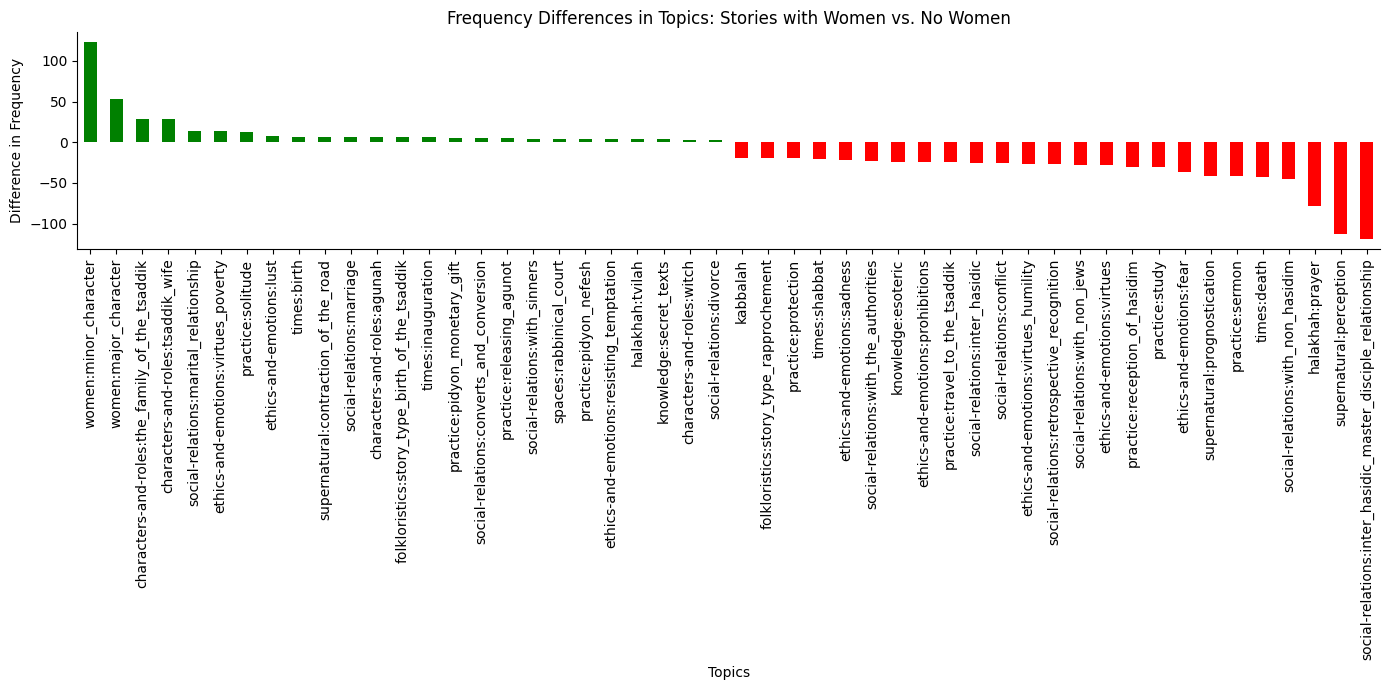

In [ ]:

# Create a new category that groups all stories with women together
data['Women-in-story-grouped'] = data['Women-in-story'].replace({
    'major': 'with-women',
    'minor': 'with-women',
    'major+minor': 'with-women',
    'no-women': 'no-women'
})

# Group by the new category and 'full tag', then count unique stories
topic_counts_grouped = data.groupby(['Women-in-story-grouped', 'full tag'])['Story'].nunique().unstack().fillna(0)

# Calculate the total number of stories in each category
total_stories_per_category_grouped = data.groupby('Women-in-story-grouped')['Story'].nunique()

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(topic_counts_grouped)

# Specify the categories for comparison
category_with_women = 'with-women'
category_no_women = 'no-women'

# Calculate the frequency differences
with_vs_no_women = topic_counts_grouped.loc[category_with_women] - topic_counts_grouped.loc[category_no_women]

# Sort the differences from positive large to negative small
with_vs_no_women = with_vs_no_women.sort_values(ascending=False)

# Remove 50 bars from the middle, keeping the most significant differences on both sides
num_bars_to_remove = 50
keep_indices = list(range(num_bars_to_remove // 2)) + list(range(-num_bars_to_remove // 2, 0))
with_vs_no_women_trimmed = with_vs_no_women.iloc[keep_indices]

# Create a DataFrame to display the observed and expected counts for a specific topic
topic = 'characters-and-roles:tsaddik_wife'
results_df = pd.DataFrame({
    'Observed Counts': topic_counts_grouped[topic],
    'Expected Counts': expected[:, topic_counts_grouped.columns.get_loc(topic)],
    'Total Stories': total_stories_per_category_grouped
})

# Display the results for the specific topic
print("Results for the topic 'characters-and-roles:tsaddik_wife':")
print(results_df)

# Plot the data
fig, ax = plt.subplots(figsize=(14, 7))

# Plot for stories with women vs no women
with_vs_no_women_trimmed.plot(kind='bar', ax=ax, color=['green' if x > 0 else 'red' for x in with_vs_no_women_trimmed])
ax.set_title("Frequency Differences in Topics: Stories with Women vs. No Women")
ax.set_ylabel('Difference in Frequency')
ax.set_xlabel('Topics')
ax.tick_params(axis='x', rotation=90)

# Customize plot aesthetics
plt.gca().spines[['top', 'right']].set_visible(False)

plt.tight_layout()
plt.show()


##Frequency difference of topics between besht and later editions


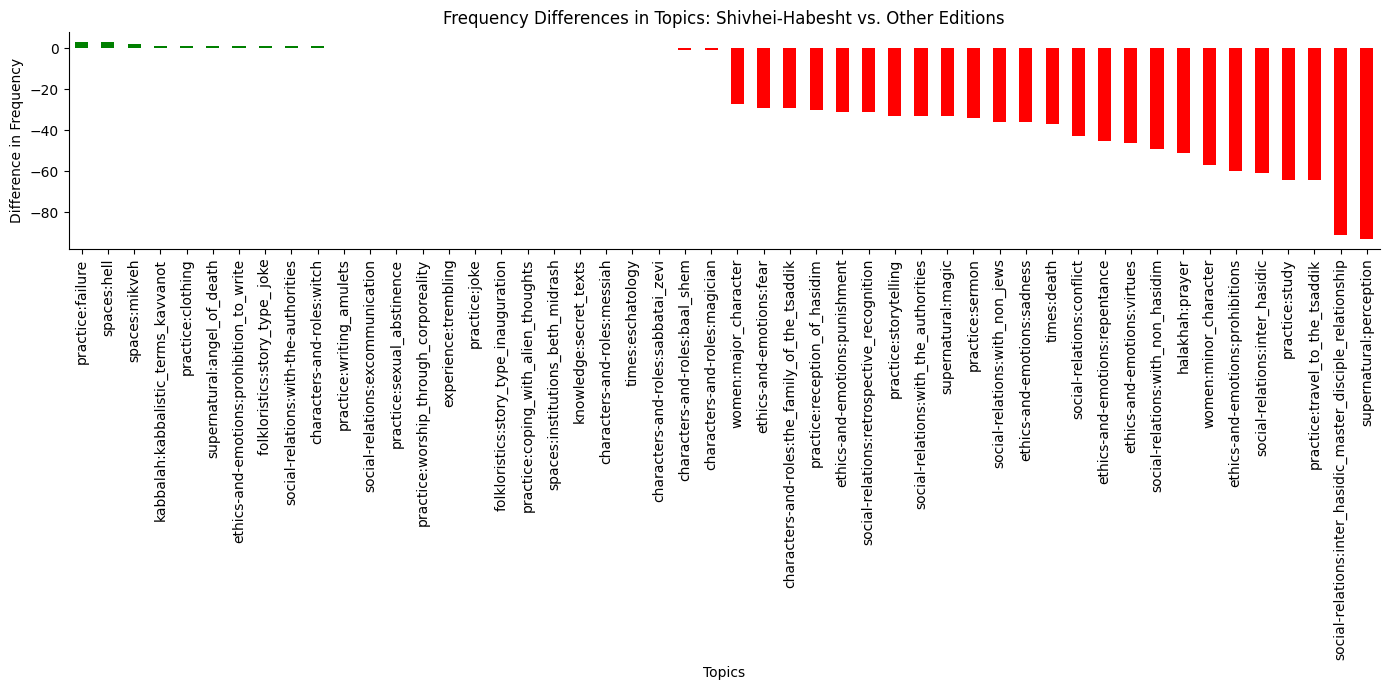

In [19]:
import matplotlib.pyplot as plt
# Group by 'Edition' and 'full tag', then count unique stories
topic_counts_by_edition = data.groupby(['Edition', 'full tag'])['Story'].nunique().unstack().fillna(0)

# Calculate the frequency difference between Shivhei-Habesht and the other editions combined
# Use the index of topic_counts_by_edition directly for filtering
other_editions = topic_counts_by_edition.index[topic_counts_by_edition.index != 'Shivhei-Habesht']
shivhei_vs_others = topic_counts_by_edition.loc['Shivhei-Habesht'] - topic_counts_by_edition.loc[other_editions].sum()

# Sort the differences from positive large to negative small
shivhei_vs_others = shivhei_vs_others.sort_values(ascending=False)

# Remove 50 bars from the middle, keeping the most significant differences on both sides
num_bars_to_remove = 50
keep_indices = list(range(num_bars_to_remove // 2)) + list(range(-num_bars_to_remove // 2, 0))
shivhei_vs_others_trimmed = shivhei_vs_others.iloc[keep_indices]

# Plot the data
fig, ax = plt.subplots(figsize=(14, 7))

# Plot for Shivhei-Habesht vs. others
shivhei_vs_others_trimmed.plot(kind='bar', ax=ax, color=['green' if x > 0 else 'red' for x in shivhei_vs_others_trimmed])
ax.set_title("Frequency Differences in Topics: Shivhei-Habesht vs. Other Editions")
ax.set_ylabel('Difference in Frequency')
ax.set_xlabel('Topics')
ax.tick_params(axis='x', rotation=90)

# Customize plot aesthetics
plt.gca().spines[['top', 'right']].set_visible(False)

plt.tight_layout()
plt.show()

##Explanation of statistics
This last section explain the statistical method for evaluating significance along with a step by step explanation of the code. Finally, it lets us experiment with our choice topic in order to understand the calculations in full.



The chi-square test used in the calculations does not just look at the raw counts for each topic but also considers the overall distribution of topics across the different categories. Here's a step-by-step explanation of how the chi-square test and subsequent frequency difference calculations are performed and how they relate to your specific question about the topic characters-and-roles

1. Grouping the Data


The data is grouped by 'Women-in-story' and 'full tag', counting the unique stories for each combination. This gives us a contingency table of observed counts:

In [ ]:
topic_counts = data.groupby(['Women-in-story', 'full tag'])['Story'].nunique().unstack().fillna(0)



2. Calculating Total Number of Stories

The total number of unique stories in each 'Women-in-story' category is calculated:


In [ ]:
total_stories_per_category = data.groupby('Women-in-story')['Story'].nunique()


3. Performing the Chi-Square Test
The chi-square test is performed to compare the observed counts to the expected counts. The expected counts are calculated based on the marginal totals of the table:

In [ ]:
total_stories_per_category = data.groupby('Women-in-story')['Story'].nunique()


4. Creating a DataFrame
The observed counts, expected counts, and total number of stories for the topic "characters-and-roles " are combined into a single DataFrame:



In [ ]:
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(topic_counts)
# Specify the topic of interest
topic = 'characters-and-roles:tsaddik_wife'

# Create a DataFrame to display the observed and expected counts
results_df = pd.DataFrame({
    'Observed Counts': topic_counts[topic],
    'Expected Counts': expected[:, topic_counts.columns.get_loc(topic)],
    'Total Stories': total_stories_per_category
})

5. Displaying the Results
The results are printed in a table format for easy comparison:


In [ ]:
print("Results for the topic 'characters-and-roles:tsaddik_wife':")
print(results_df)

#This table provides a clear comparison of the observed counts, expected counts, and total number of stories for each 'Women-in-story' category.



Results for the topic 'characters-and-roles:tsaddik_wife':
                Observed Counts  Expected Counts  Total Stories
Women-in-story                                                 
major                       7.0         3.069977             49
major+minor                 2.0         0.432588              4
minor                      22.0         9.202955            119
no-women                    3.0        21.294480            480


In [ ]:

# Assuming 'data' is your DataFrame containing the TSV data
# Choose the topic of interest
chosen_topic = 'characters-and-roles:tsaddik_wife'

# Filter the data for the chosen topic
filtered_data = data[data['full tag'] == chosen_topic]

# Group the stories by 'Women-in-story' category
stories_by_category = filtered_data.groupby('Women-in-story')['Story'].apply(list).reset_index()

# Display the results
#print(f"List of stories for the topic '{chosen_topic}' divided by women-related category:")
#print(stories_by_category)

# If you want to display this in a more readable format
for index, row in stories_by_category.iterrows():
    category = row['Women-in-story']
    stories = row['Story']
    print(f"\nCategory: {category}\nStories: {stories}")




Category: major
Stories: ['Shivhei-Habesht_0030', 'Shivhei-Habesht_0033', 'Shivhei-Habesht_0043', 'Shivhei-Habesht_0122', 'Maase-Zadikim_0037', 'Khal-Hasidim_0143', 'Khal-Hasidim_0159']

Category: major+minor
Stories: ['Khal-Hasidim_0242', 'Adat-Zadikim_0013']

Category: minor
Stories: ['Shivhei-Habesht_0002', 'Shivhei-Habesht_0003', 'Shivhei-Habesht_0004', 'Shivhei-Habesht_0005B', 'Shivhei-Habesht_0010', 'Shivhei-Habesht_0012', 'Shivhei-Habesht_0097', 'Shivhei-Habesht_0165', 'Mifalot-HaZadikim_0015', 'Mifalot-HaZadikim_0017', 'Mifalot-HaZadikim_0023', 'Maase-Zadikim_0016', 'Khal-Hasidim_0002', 'Khal-Hasidim_0003', 'Khal-Hasidim_0004', 'Khal-Hasidim_0009', 'Khal-Hasidim_0019', 'Khal-Hasidim_0021', 'Khal-Hasidim_0082', 'Khal-Hasidim_0092', 'Khal-Hasidim_0202', 'Khal-Hasidim_0206']

Category: no-women
Stories: ['Shivhei-Habesht_0169', 'Khal-Hasidim_0127']
